##  Simulación 2 || Vargas Nancy
Estadística y Probabilidades || Comisión E




# **Completando el álbum de figuritas del mundial de clubes 2025**

### **Consigna**

Armar una simulación basada en $N=100$ repeticiones que permita estimar el promedio de paquetes necesarios para conseguir llenar el álbum de figuritas del Mundial Qatar 2022. **[OPCIONAL]** Si es posible, representar el histograma de la cantidad de paquetes necesarios para completar el álbum a partir de la simulación. Puede usarse ``import seaborn as sns`` y ``sns.histplot()``.

A diferencia de la resolución a mano, aquí propondremos una versión más realista: el álbum del Mundial Qatar 2022 tiene ``figus_total=860`` y vamos a suponer que el paquete no trae una figurita, sino varias: ``figus_paquete=5``. Además, Panini, empresa creadora del álbum del Mundial Qatar 2022, asegura que NO vienen figuritas repetidas por paquete. Para resolver este problema, podés optar por simularlo de acuerdo con esto que asegura Panini, o no. Es tu elección.


**[PISTAS]** Para la construcción de la simulación, se sugiere la siguiente estructura, ya que no hemos estimado otra cosa que no sean probabilidades y, para este problema, necesitamos estimar una esperanza.

1.  Para el armado del bullet "1. Experimento aleatorio", definir la función ``cuantos_paquetes(figus_total, figus_paquete)`` que dado el tamaño del álbum (``figus_total``) y la cantidad de figuritas por paquete (``figus_paquete``) genere un álbum nuevo, simule su llenado y devuelva cuántos paquetes se debieron comprar para completarlo.
2.  Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar ``N`` y armar ``N=100`` muestras de ``cuantos_paquetes(figus_total, figus_paquete)`` que se guarden en ``muestras``.
3.  En esta instancia, como vimos, estaríamos armando el bullet "3: Una función _filtro_ que caracteriza el evento E" para luego estimar $P(E)$ por la frecuencia relativa de su aparición en las $N$ muestras. Sin embargo, aquí no hay evento para estimar: lo que queremos estimar es una esperanza. Para hacerlo, la aproximaremos por su promedio muestral, es decir, por el promedio de lo observado en ``muestras``. Para ello, podés usar el comando ``np.mean(muestras)``. Esto nos dará una estimación del promedio de paquetes necesarios para completar un álbum del Mundial Qatar 2022 a partir de una simulación de $N$ replicaciones.

**[SUGERENCIA PARA EL BULLET 1]** Armar la función ``cuantos_paquetes(figus_total, figus_paquete)`` puede ser desafiante. Te compartimos una posible estructura que puede ayudarte a implementarla.

- Implementá una función ``crear_album(figus_total)`` para crear un vector ``album`` que tenga un total de ``figus_total`` ceros. Es decir, vamos a representar al álbum por un vector en el que cada posición representa el estado de una figurita con dos valores: 0, para indicar que aún no la conseguimos, y 1, para indicar que sí. El álbum se inicia con todas sus posiciones en 0, hasta que empezamos a comprar figuritas y pegarlas.

- Implementá una función ``comprar_paquete(figus_total,figus_paquete)`` que, dada la cantidad de figuritas por paquete (figus_paquete), genere un ``paquete`` (lista) de figuritas al azar. Si respetamos lo que afirma Panini de que no hay figuritas repetidas por paquete, usá el comando ``rd.sample``, ya que estaremos tomando una muestra de figuritas sin reposición.

- Implementá la función ``pegar_figus(album,paquete)`` que complete con un 1 las figuritas del álbum que te hayan tocado. Recordá que los vectores se indexan desde 0, entonces, te va a convenir que la posición ``[i]`` del ``album`` toma el valor 1 si alguno de los elementos de la lista ``figus`` contiene al valor ``i``. Pero, para eso, generá las figuritan en ``range(0,figus_total)``, es decir, figuritas que toman valores de 0 hasta ``figus_total-1``. Lo importante es que aquellas figuritas que no te hayan tocado conserven el 0 en la posición correspondiente del vector ``album``. En este problema, no abordamos la complejidad que significaría intercambian y considerar todas las repetidas que podés tener.

- Implementá la función ``album_incompleto(album)`` que recibe un vector ``album`` y devuelve ``True`` si el álbum ``A`` no está completo y ``False`` si lo está. Recordá que un álbum estará incompleto siempre que haya al menos un cero en alguna de sus posiciones.

- Por último, utilizá todas estas funciones para crear una única función que las invoque y que se llame ``cuantos_paquetes(figus_total, figus_paquete)`` que cuente la cantidad de paquetes necesarios hasta completar el álbum. Necesitarás usar la estructura de control ``while()``, pues comprarás paquetes mientras el álbum siga incompleto; y deberás generar un contador de ``paquetes_comprados`` que arranque en 0 y sume un 1 cada vez que compres un nuevo paquete.

Del ***14 de junio al 13 de julio de 2025*** se celebra el ***Mundial de clubes***, y junto con este evento, vuelve una pasión paralela para muchos fanáticxs: ¡Completar el álbum de figuritas!
En este trabajo nos proponemos **simular cuántos sobres necesitamos para llenarlo** usando programación y herramientas de estadística.

### **Objetivo**
* Simular el proceso de llenado del álbum de figuritas del mundial de clubes 2025.
* Estimar cuántos sobre (de 5 figuritas cada uno) se neccesitan para completarlo.
* Evaluar el impacto del azar y las repeticiones.
* Visualizar los resultados y reflexionar sobre ellos.

## **Datos del problema**
* El álbum del Mundial de Clubes 2025 tiene 550 figuritas para completar.
* Cada sobre contiene 5 figuritas.
* Algunos sobres incluyen figuritas especiales brillantes.
* Supongamos que todas las figuritas (comunes y brillantes) tienen **la misma probabilidad de aparecer**.
* No se repiten figuritas dentro del mismo sobre.
* Usaremos simulación para estimar cuántos sobres hacen falta para completarlo.

### **Herramientas**
Para llevar a cabo esta simulación en Python, vamos a utilizar cuatro librerías muy comunes en ciencia de datos y análisis computacional:
* Random: para generar valores aleatorios, fundamentales para modelar situaciones probabilísticas.
* NumPy: para trabajar con vectores, arreglos y realizar cálculos numéricos de manera rápida y eficiente.
* Matplotlib: para crear gráficos y visualizar los resultados de forma clara y atractiva.
* Time: para medir el tiempo de ejecución y analizar el rendimiento del código.

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
print("Vamos a descubrir cuántos sobres hacen falta para llenar el álbum del Mundial de Clubes 2025")


Vamos a descubrir cuántos sobres hacen falta para llenar el álbum del Mundial de Clubes 2025


### **Azar y Tecnología**
Para simular la experiencia de abrir sobres de figuritas sin saber qué nos va a tocar, necesitamos un **sistema estocástico**, es decir, un proceso con elementos aleatorios. Y aunque los **sistemas informáticos** son dispositivos deterministas (siguen instrucciones precisas), podemos usar módulos especiales que generan **números pseudoaleatorios:** valores que se comportan como si fueran aleatorios.

En Python, el módulo random nos permite generar este tipo de datos.

**Un ejemplo:**

In [4]:
# Simulemos el lanzamiento de un dado
dado = rd.randint(1,6)
print(f"El número del dado es: {dado}")


El número del dado es: 5


Este código devuelve un número entre 1 y 6, como si tiráramos un dado real.
Lo mismo haremos para simular las figuritas dentro de casa sobre.

## **Modelando**
Para simular n sobre de figuritas, usamos random.sample(seq, k) de Python. Esta función selecciona k **elementos distintos al azar** desde una secuencia dada, sin repetición.

En nuestro caso, vamos a elegir **5 figuritas únicas** entre las **550 que hay total** para **el álbun del Mundial de Clubes 2025:**

In [5]:
# Simulemos un sobre con 5 figuritas distintas entre 0 y 549.
sobre = rd.sample(range(550), 5)
print(f"Figuritas del sobre: {sobre}")


Figuritas del sobre: [39, 545, 55, 275, 170]


## **Definición de constantes**
Antes de comenzar con la sumulación, vamos a definir algunas **constantes clave:**
- figus_paquete: cantidad de figuritas que vienen en cada sobre.
- figus_total: cantidad total de figuritas del álbum.
- cantidad_de_corridas: número de veces que se repetirá la simulación para obtener un resultado promedio confiable.

## **Números de simulaciones**
Cauntas más veces repitamos la simulación, **más preciso será el promedio estimado**
Sin embargo, esto también implica un mayor uso de recursos y tiempo de ejecución.

Realizaremos **10.000 corridas**, lo cual ofrece un buen equilibrio entre precición y rendimiento. Esta cantidad puede tardar unos **5 a 10 minutos** en equipos estándar.


## **Constantes de la simulación.**

In [11]:
# Parámetros de la simulación.

figus_paquete = 5        #Figuritas por sobre.
figus_total = 550        #Figuritass totales del álbum.
cantidad_de_corridas = 10000     #Número de simulaciones.

## **Se definen las funciones que se van a usar**

In [12]:
def crear_album(figus_total):
  #Crea una lista de numpy con figus_total ceros
  return np.zeros(figus_total)

Testeamos que se cree el arreglo de figus_total número de ceros

In [13]:
crear_album(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def comprar_paquete(figus_total,figus_paquete):
  return rd.sample(range(figus_total), figus_paquete)



Testeamos que se generen al azar, y sin reposición, figus_paquete números de figus_total números posibles.

In [16]:
for i in range(10):
  print(comprar_paquete(10,5))

[2, 5, 6, 7, 0]
[6, 3, 8, 2, 1]
[4, 0, 6, 9, 3]
[1, 2, 7, 8, 9]
[7, 0, 2, 8, 1]
[3, 6, 2, 4, 5]
[8, 9, 1, 2, 6]
[3, 2, 8, 1, 9]
[8, 6, 0, 9, 1]
[4, 2, 8, 9, 5]


In [17]:
def pegar_figus(album,paquete):
  album[paquete] = 1

Chequeamos

In [18]:
album=crear_album(10)
print(album)
paquete=comprar_paquete(10,5)
print(paquete)
pegar_figus(album,paquete)
print(album)
paquete=comprar_paquete(10,5)
print(paquete)
pegar_figus(album,paquete)
print(album)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5, 9, 8, 6, 4]
[0. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
[4, 8, 1, 7, 9]
[0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


In [19]:
def album_incompleto(album):
  return np.min(album) == 0

Chequeamos

In [20]:
print(album_incompleto(np.asarray([0,1,0,1])))
print(album_incompleto(np.asarray([0,0,0,0])))
print(album_incompleto(np.asarray([1,1,1,1])))

True
True
False


In [22]:
def cuantos_paquetes(figus_total, figus_paquete):
  album = crear_album(figus_total)
  cantidad_de_paquetes = 0
  while album_incompleto(album):
    paquete = comprar_paquete(figus_total, figus_paquete)
    pegar_figus(album, paquete)
    cantidad_de_paquetes += 1
  return cantidad_de_paquetes


In [23]:
cuantos_paquetes(20, 5)

11

## **Inicialización del vector de resultados.**

In [24]:
# Creamos un array para registrar cuántos sobres se encesitaron en cada recorrida.
simulacion = np.empty(cantidad_de_corridas)

## **Ciclo principal de la simulación + Medición del tiempo de ejecución**
En este bloque realizamos múltimples simulaciones (10.000 corridas) para estimar cuántas sobres se encesitan, en promedio, para completar un álbum de 550 figuritas.

Al finalizar la simulación, se detiene el cronómetro y se muestra el tiempo total que tomó el proceso.

In [25]:
qwer=np.zeros(8)
print(qwer)
tirada=rd.sample(range(len(qwer)), 3)
print(tirada)
qwer[tirada] += 1
qwer

[0. 0. 0. 0. 0. 0. 0. 0.]
[3, 1, 7]


array([0., 1., 0., 1., 0., 0., 0., 1.])

In [26]:
# Iniciar cronómetro.
inicio = time.time()
rd.seed(10) #La semilla usada
#Ciclo principal de la simulación.
for i in range(cantidad_de_corridas):
  cantidad_de_sobres = cuantos_paquetes(figus_total, figus_paquete)
  simulacion[i] = cantidad_de_sobres

#Imprime primeros resultados
print(simulacion[:10])  # Muestra los primeros 10 valores
print(f"Promedio de sobres necesarios: {simulacion.mean():.2f}")

# Finaliza el cronómetro
fin = time.time()
duracion = fin - inicio

#Mostrar duración
print(f"Duración de la simulación: {duracion: .2f} segundos")

[ 751. 1196.  680.  599.  696.  759.  797.  615.  820.  837.]
Promedio de sobres necesarios: 755.70
Duración de la simulación:  119.35 segundos


## **Presentación visual de los resultados**
Luego de realizar las simulaciones, obtuvimos mcuhso valores diferentes sobre la cantidad de sobres ecessarios para llenar el álbum. Para entender mejor esta variabilidad, vamos a **graficar un histograma** con los resultados.



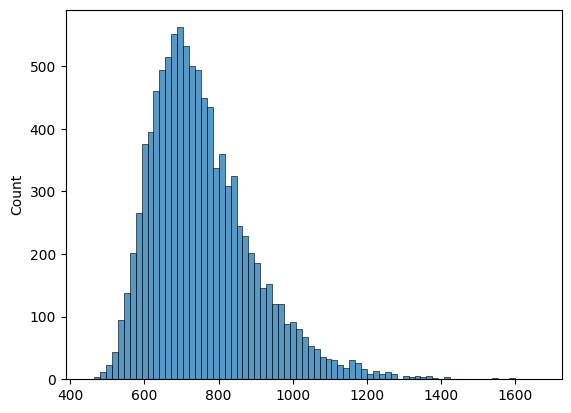

In [27]:
sns.histplot(simulacion)
plt.show()

In [31]:
# Análisis de resultados

# Promedio de sobres necesarios para completar el álbum
sobres_promedios = simulacion.mean()
print(f"Promerio de sobres necesarios para completar el álbum: {sobres_promedios: .2f}")

#Total figuritas compradas (incluye repetidas)
figuritas_totales = sobres_promedios * figus_paquete


# Figuritas repetidas estimadas
repetidas = figuritas_totales - figus_total
print(f"Figuritas repetidas estimadas: {int(repetidas)}")


Promerio de sobres necesarios para completar el álbum:  755.70
Figuritas repetidas estimadas: 3428


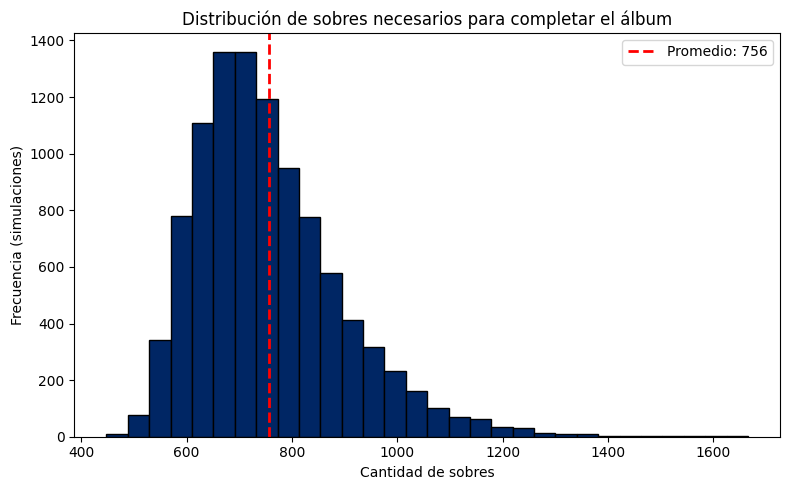

In [33]:
# Histograma de sobres necesarios
plt.figure(figsize=(8,5))
plt.hist(simulacion, bins=30, color='#002664', edgecolor='black')
plt.title("Distribución de sobres necesarios para completar el álbum")
plt.xlabel("Cantidad de sobres")
plt.ylabel("Frecuencia (simulaciones)")
plt.axvline(sobres_promedios, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {sobres_promedios:.0f}')
plt.legend()

plt.tight_layout()
plt.show()


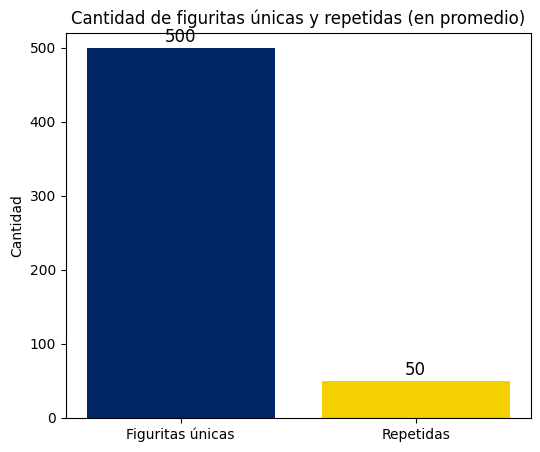

In [34]:
# Datos
figus_total = 550
repetidas = 50
unicas = figus_total - repetidas

datos = [unicas, repetidas]
etiquetas = ['Figuritas únicas', 'Repetidas']
colores = ['#002664', '#f5d000']
plt.figure(figsize=(6,5))
plt.bar(etiquetas, datos, color=colores)

plt.title("Cantidad de figuritas únicas y repetidas (en promedio)")
plt.ylabel("Cantidad")
plt.ylim(0, max(datos) + 20)

for i, valor in enumerate(datos):
    plt.text(i, valor + 2, str(valor), ha='center', va='bottom', fontsize=12)

plt.show()


## **Costo estimado de llenar el álbum**
Dado que estamos trabajando con un experimento aleatorio, los resultados pueden variar ligeramente en cada simulación.
Sin embargo, podemos estimar que llenar el álbum requerirá unos 755 sobres en promedio.

A un precio de $1250 por sobre, esto equivale a:

In [35]:
# Estimación del costo total.

precio_sobre = 1250 #Pesos argentinos.

costo_total = sobres_promedios * precio_sobre
print(f"Costo estimado para llenar el álbum: ${int(costo_total)} pesos")


Costo estimado para llenar el álbum: $944622 pesos


Despreciamos el costo del **álbum** que es $5000 respecto al costo total de las figuritas.

In [36]:
sobres_promedio = simulacion.mean()
print(f"Promedio de sobres: {sobres_promedio}")


Promedio de sobres: 755.6978


## **Conclusión**

A lo largo de este trabajo simulamos el clásico desafío de llenar un álbum de figuritas, combinando herramientas de programación y análisis estadístico. Descubrimos que, en promedio, se necesitan unos **755 sobres** para completar un álbum de 550 figuritas, lo que representa un costo estimado de **casi $ 944,207 pesos argentinos**, sin contar el precio del álbum (que a esta altura parece lo menos preocupante).
